In [1]:
!pip install umap-learn

In [2]:
!pip install -U sentence-transformers

## **1. Chargement des données et des library**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

In [4]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

## **2. focntion dimred UMAP**

In [5]:
import umap
def dim_red(embedding, p):
    umap_model =umap.UMAP()  # Use umap.UMAP to create an instance of the UMAP class
    reduced_embeddings = umap_model.fit_transform(embedding)
    return reduced_embeddings


In [7]:
umap_dim_red = dim_red(embeddings, 20)

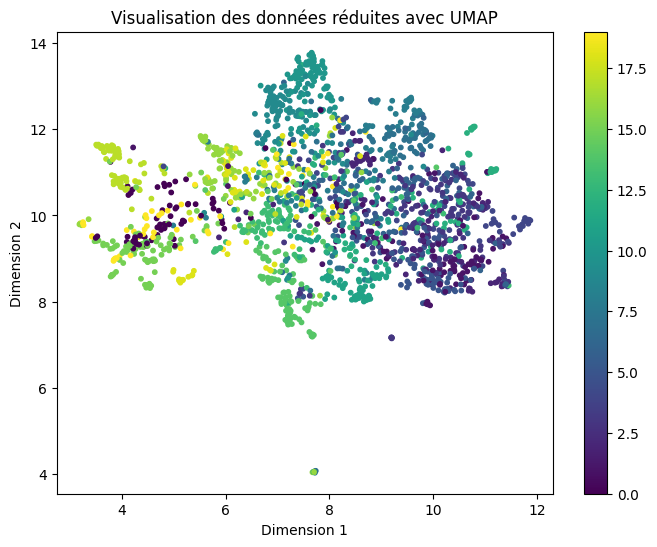

In [8]:
import matplotlib.pyplot as plt

# Supposons que reduced_embeddings et labels sont vos données réduites et étiquettes respectivement

# Création du scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(umap_dim_red[:, 0], umap_dim_red[:, 1], c=labels, cmap='viridis', s=10)  # Remplacez les index 0 et 1 selon le nombre de dimensions réduites
plt.colorbar()  # Ajout d'une barre de couleur pour les étiquettes
plt.title('Visualisation des données réduites avec UMAP')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## **3. Kmeans**

In [12]:
from sklearn.cluster import KMeans
# Initialisation du modèle K-means avec le nombre de clusters souhaité


kmeans = KMeans(n_clusters=k, random_state=42)

# Entraînement du modèle sur les données réduites
kmeans.fit(umap_dim_red)

# Obtention des étiquettes de cluster pour chaque point de données
etiquettes_clusters = kmeans.labels_

# Centres des clusters
centres_clusters = kmeans.cluster_centers_

# Affichage des étiquettes des clusters pour chaque point
print(etiquettes_clusters)

# Affichage des centres des clusters
print(centres_clusters)

[11  4  1 ... 14  4 13]
[[ 9.515769   9.418786 ]
 [ 5.236024   9.520719 ]
 [ 7.6123986 13.210191 ]
 [11.230091   9.117321 ]
 [10.163545   8.578104 ]
 [ 8.568868   8.41364  ]
 [ 4.108186   9.247101 ]
 [ 4.0272045 11.10464  ]
 [ 8.343654  11.455284 ]
 [ 7.7084823  4.0496387]
 [ 7.197157  10.801251 ]
 [ 9.481694  12.046947 ]
 [10.57857   11.115714 ]
 [ 7.281751   8.020879 ]
 [ 8.326756   9.944612 ]
 [10.501472  10.081546 ]
 [ 6.9652     9.596157 ]
 [ 7.1546254 12.284299 ]
 [ 9.404989  10.593471 ]
 [ 5.930044  11.03439  ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


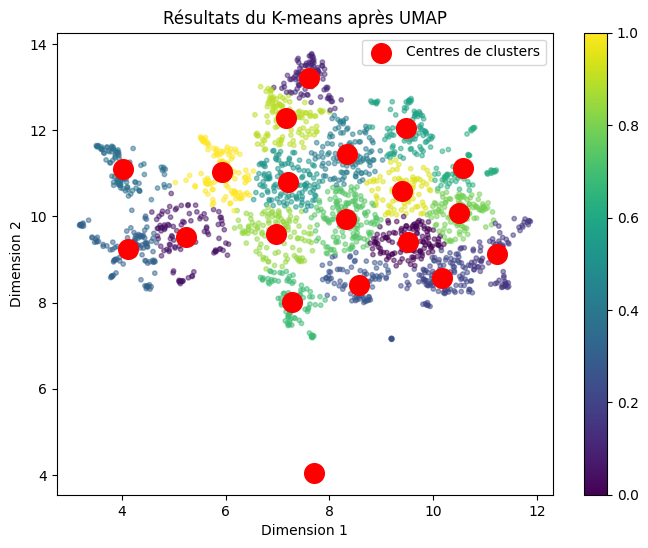

In [13]:
# Création du scatter plot pour visualiser les clusters
plt.figure(figsize=(8, 6))

# Plot des points pour chaque cluster
plt.scatter(umap_dim_red[:, 0], umap_dim_red[:, 1], c=etiquettes_clusters, cmap='viridis', s=10, alpha=0.5)  # Remplacez les index 0 et 1 selon les dimensions à visualiser

# Plot des centres de clusters
plt.scatter(centres_clusters[:, 0], centres_clusters[:, 1], marker='o', c='red', s=200, label='Centres de clusters')  # Remplacez les index 0 et 1 selon les dimensions à visualiser

plt.colorbar()  # Ajout d'une barre de couleur pour les étiquettes des clusters
plt.title('Résultats du K-means après UMAP')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()